# Introduction

According the [S&P/Experian Consumer Credit Default Index](https://us.spindices.com/index-family/specialty/consumer-credit-default), consumer credit default indices show higher default rates for all loan types in December 2018. Residents of big cities, including Chicago, New York, Los Angeles, Dallas or Miami, have the highest default rate. For banks and other financial institute, it is important to be able to predict which customers is more likely to default on their debts. So they can avoid paying the debts for their customers in the end. Predicting credit card default is a very important topic for financial institutes, as it is similar to the problem of financial fraud detection.


Financial fraud detection is a very important topic. In [Oxford English Dictionary](p.562), it defined fraud as "wrongful or criminal deception intended to result in financial or personal gain." In Economics, financial fraud is an increasingly serious problem. Enron, Cendant, and WorldCom are examples of large companies torn apart by financial fraud and scandal. The most common financial fraud includes bank fraud, insurance fraud, securities, and commodities fraud, and corporate fraud, etc. The related research paper shows that data mining techniques have been applied most extensively to the detection of insurance fraud, then corporate fraud and credit card fraud. 

Ngai et al. (2011) summaries the data mining techniques in financial fraud detection and reports six main classes of methods: classification, regression, clustering, prediction, outlier detection, and visualization. The primary data mining techniques used for financial fraud detection are logistic regression, neural networks, Naive Bayes, decision trees. In this project, I would like to use most of the methods mentioned above to predict on the credit card default rate on the dataset.


# Dataset
This data data set is about [default of credict card clients](https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients). 
The original research aimed to compare the predictive accuracy of the probability of default among six data mining methods,  including K-nearest Neighbors (KNN), Naive Bayes (NB), Neural Networks (NNs), and classification trees.
## Number of observations
There are 30000 in total.
## Attributes
There are 23 different explanatory variables:
- LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. 
- SEX: Gender (1 = male; 2 = female). 
- EDUCATION: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
- MARRIAGE: Marital status (1 = married; 2 = single; 3 = others). 
- AGE: Age (year). 
- PAY_0 – PAY_6: History of past payment. 
    - PAY_0 = the repayment status in September, 2005; 
- PAY_2 = the repayment status in August, 2005; 
- PAY_3 = the repayment status in July, 2005;
- PAY_4 = the repayment status in June, 2005;
- PAY_5 = the repayment status in May, 2005;
    - PAY _6= the repayment status in April, 2005. 
    - The measurement scale for the repayment status is: 
        - 1 = pay duly; 
        - 1 = payment delay for one month; 
        - 2 = payment delay for two months; 
        - 3 = payment delay for two months;
        - 4 = payment delay for two months;
        - 5 = payment delay for eight months; 
        - 6 = payment delay for two months;
        - 7 = payment delay for two months;
        - 8 = payment delay for eight months; 
        - 9 = payment delay for nine months and above. 
- BILL_AMT1 – BILL_AMT6: Amount of bill statement (NT dollar).
    - BILL_AMT1 = amount of bill statement in September, 2005; 
    - BILL_AMT2 = amount of bill statement in August, 2005; 
    - BILL_AMT3 = amount of bill statement in July, 2005; 
    - BILL_AMT4 = amount of bill statement in June, 2005; 
    - BILL_AMT5 = amount of bill statement in May, 2005; 
- BILL_AMT6 = amount of bill statement in April, 2005. 
- PAY_AMT1 - PAY_AMT6: Amount of previous payment (NT dollar). 
    - PAY_AMT1 = amount paid in September, 2005; 
    - PAY_AMT2 = amount paid in August, 2005; 
    - PAY_AMT3 = amount paid in July, 2005; 
    - PAY_AMT4 = amount paid in June, 2005; 
     - PAY_AMT5 = amount paid in May, 2005;
    - PAY_AMT6 = amount paid in April, 2005. 
The target variable is default payment (yes = 1, and no = 0).


# Plan
I plan to carry out the following steps.
1. Exploratory Data Analysis
2. Data preprocessing and data cleaning
3. Feature engineering
4. Model training
  - KNN
  - Naive Bayes
  - Random Forest
  - Gradient Boosting Model
  - Neural Network
  - Support Vector Machine
  - Linear Discriminant Analysis + Support Vector Machine
  - Clustering
  - Outlier Detection

# Data Wrangling

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000

In [2]:
df = pd.read_csv("Copyofdefaultofcreditcardclients.csv", header=1, index_col=0)

In [3]:
df.shape

(30000, 24)

(30000, 24)

- There are 30000 records and 24 different variables. I visually inspect the first five and last five rows of the data.

In [4]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# Fix column names inconsistency
df.rename(columns = {'default payment next month': 'default',
                    'PAY_0': 'PAY_1'}, inplace=True)

## Categorical Variables
I count the frequency for each categorical variables. I find a few strange things:
- for Education, there are undocumented category (0, 5, 6). Future investigation could be done if I have access to people who created this data. Since I do not have that access, for now, I will group 0, 5, 6 to others (which is 4).
- For Marital status, the class 0 is not documented. For now, I group 0 to others (which is 3).


In [6]:
df['EDUCATION'] = [ 4 if i in [0, 5, 6] else i for i in df.EDUCATION]
print(df.EDUCATION.value_counts())
df.loc[df.MARRIAGE == 0,'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64
2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64


2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

## Missing Value
I also check if there is any missing values. I did not find any missing values in the current dataset. However, if I have missing values, I would need to investigate the nature of the missing values. 
- If the records with missing values are only a small fraction of the dataset, we can remove all the cases with missing values.
- If we are dealing with a small data set, we need to see which imputation methods we could use for the data set. If the missing value is numerical and missing at random, we can use mean if fitting with a linear regression, since mean is unbiased estimator. If we want a simple measure that is robust to outliers, we could use median. 
- Another good choice for imputation is to use models to predict the missing values. A good example is MICE (multivariate Imputation via Chained Equations). In Python, FancyImpute has a function IterativeImputer, which is similar to MICE but it returns a single imputation. We can also use interpolation with linear regression, random forest, and so on.
- If the missing value is categorical, one could impute value ”missing” to make missing values as a category. We can also impute with the most frequent class.

In [7]:
# Find missing values: no missing values
df.isnull().sum()

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64

# Outliers
I applied median-absolute-deviation (MAD) based outlier detection for all numerical features. I used a threshold of 3.5. A data point with Z score whose absolute value larger than 3.5 is labeled as an outlier. I also used boxplot to check for outliers.

However, outliers do not mean errors. It could be a valid point as well. By checking the data for balance limit records, they look valid points.

In [8]:
def mad_based_outlier(points, thresh=3.5): 
    if len(points.shape) == 1: 
        points = points[:,None] 
    median = np.nanmedian(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1) 
    diff = np.sqrt(diff)
    med_abs_deviation = np.nanmedian(diff) 
    modified_z_score = 0.6745 * diff / med_abs_deviation
    return modified_z_score > thresh 

In [9]:
from collections import defaultdict
dct = defaultdict(list)
nums = ['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'] 
allnum = df[nums]
for num in nums:
    temp = df[num]
    dct[num] = temp[mad_based_outlier(temp)].index.tolist()

In [10]:
# df.iloc[dct['LIMIT_BAL']].shape 
import itertools
allout = []
for num in nums:
    allout.append(dct[num])
merged = list(itertools.chain(*allout))
print('There are ' + str(len(set(merged))) + ' records with extreme values.')

There are 10791 records with extreme values.
There are 10791 records with extreme values.


In [11]:
# DataFrame with no outliers
pd_noout = df.drop(merged, axis=0)
pd_noout.shape

(19209, 24)

(19209, 24)

I am going to make Age categorical.

In [12]:
# df.AGE.describe()
bins = np.arange(30, 80, 10)
df['agecat'] = np.digitize(df.AGE, bins)
# plt.hist(df.agecat, bins=10);
# # df[['AGE', 'agecat']].head() 
# df.agecat.value_counts()

In [13]:
cats = ['SEX', 'EDUCATION', 'MARRIAGE', 'agecat',
        'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for cat in cats:
    df[cat] = df[cat].astype('category')
# df.info()

In [14]:
bins = np.arange(30, 80, 10)
df['agecat'] = np.digitize(df.AGE, bins)
df.agecat.value_counts()

1    11238
0     9618
2     6464
3     2341
4      314
5       25
Name: agecat, dtype: int64

1    11238
0     9618
2     6464
3     2341
4      314
5       25
Name: agecat, dtype: int64

It seems that we can group 60-70 with 70-80, considering the small number of records in each group and similar default rate.

In [15]:
bins = np.arange(30, 70, 10)
df['agecat'] = np.digitize(df.AGE, bins)


Based on the age group above, it seems like that it might make sense to divide the age into three groups, 20-30, 30 -40, and $>40$.

In [16]:
df['age2'] = [0 if i<=30 else (1 if i <=40 else 2) for i in df.AGE]
# PerStackBar_label_two('age2',df=df, m=['20-30', '30-40', '>40'],figsize=(10,8))

# Results Part 1:
The graphs above reveal several things:
- The default rate for male (24.2%) is significantly higher (p-value < 0.01) than female (20.8%). To be specific, the default rate for male is higher than the overall rate (22.1%), while the default rate for female is smaller than the overall rate. 
- The default rate for people whose highest eduacation is university and high school is higher than the overall rate, while the default rate for graduate school are lower than the overall rate.
- The default rate for married and other people is higher than the overall rate, while the default rate for single people is lower than the overall rate.
- The default rate for the age group 30-40 is the lowest, and the default rate for 60 and above is the highest. 

All four categorical variables have significant impact on the default rate.

The overall message is 
1. Male is more likely to default than females;
2. The highest education is university or lower is more likely to default;
3. Married people is more likely to default than single people;
4. People younger than 30 or older than 40 is more likely to default, especially for people older than 40.

In [17]:
df['prop1'] = df.PAY_AMT1/df.BILL_AMT1

check = df.loc[df.BILL_AMT1!=0, ['PAY_1', 'prop1','PAY_AMT1', 'BILL_AMT1', 'LIMIT_BAL']]
check.head()
# print(check[check.PAY_1==0].head())
# print(check[check.PAY_1==-1].head(20))
# check[check.prop1==np.inf].head()

,PAY_1,prop1,PAY_AMT1,BILL_AMT1,LIMIT_BAL
ID,,,,,
1,2,0.000000,0,3913,20000
2,-1,0.000000,0,2682,120000
3,0,0.051917,1518,29239,90000
4,0,0.042562,2000,46990,50000
5,-1,0.232099,2000,8617,50000


,PAY_1,prop1,PAY_AMT1,BILL_AMT1,LIMIT_BAL
ID,,,,,
1,2,0.000000,0,3913,20000
2,-1,0.000000,0,2682,120000
3,0,0.051917,1518,29239,90000
4,0,0.042562,2000,46990,50000
5,-1,0.232099,2000,8617,50000


Strange things:

The Pay_1 to Pay_6 are the repayment status in September, 2015 to April, 2015. The positive number is the number of months a payment is delayed. -1 means pay duly. However, It does not mention -2 and 0 in the description. I am trying to find out the answer in the data first. 

I looked at PAY_AMT1, BILL_AMT1, and PAY_1, which are the payment amount, bill amount, and payment status for September, 2015. I found several strange thing with this data. 
- For example, for ID 2, the bill amount is 2682 and the payment amount is 0, but the case is still labeled as -1, which means pay duly. The explanation I could come up with is that sometime credit card company has some promotion for certain amount of time. Even though this person has a positive bill amount, the minimum payment is 0? Otherwise, I could not make sense of this.
- I cannot tell the difference between payment status 0, -1, -2. If -1 means pay duly, what about 0 and -2? I checked the proportion of the payment amount and the bill amount, I cannot tell if there is a threshold they use here. 
- Even though the bill amount is negative amount, people still pay the credit card. Some are labeled as -1, some are labled as -2 and some are labeled as 0. This does not make any sense.

This occurs to me that it may be possible that PAY_AMT1 is for BILL_AMT2, rather than BILL_AMT1. This means that the amount one pays in Sepetember, 2015 is for the bill issued in August, 2015.

It seems like the amount paid in September, 2015 is for the bill in August, 2015. But I still could not make sense of the repayment status. 

I am curious to see how the repayment status changes over time.

In [18]:
# make sure the payment status is -1 if the balance for that month is negative
df['default'] = [i if j>0 else 0 for i, j in zip(df.default, df.BILL_AMT1) ]
df['PAY_1'] = [i if j>0 else -1 for i, j in zip(df.PAY_1, df.BILL_AMT2) ]
df['PAY_2'] = [i if j>0 else -1 for i, j in zip(df.PAY_2, df.BILL_AMT3) ]  
df['PAY_3'] = [i if j>0 else -1 for i, j in zip(df.PAY_3, df.BILL_AMT4) ]  
df['PAY_4'] = [i if j>0 else -1 for i, j in zip(df.PAY_4, df.BILL_AMT5) ]  
df['PAY_5'] = [i if j>0 else -1 for i, j in zip(df.PAY_5, df.BILL_AMT6) ]
df['PAY_5'] = [i if j>0 else -1 for i, j in zip(df.PAY_5, df.BILL_AMT6) ]  

# Continuous Variable
Now I want to see how these continuous variables are related to each other and how they impact whether a person defaults in the next month.

In [19]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [20]:
cons = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','default']
# cons = ['LIMIT_BAL', 'BILL_AMT1', 'PAY_1',
#        'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','default']
# sns.pairplot(df[cons], hue='default');

In [21]:
df['balprop1'] = df.BILL_AMT1/df.LIMIT_BAL
# df.groupby('default').balprop1.plot(kind='kde') 
# plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=['good','default'])
# plt.xlabel('x1')

In [22]:
df.loc[df.balprop1>1,['LIMIT_BAL', 'default', 'BILL_AMT1', 'PAY_1','PAY_AMT1','BILL_AMT2',
                      'PAY_2', 'PAY_AMT2', 'BILL_AMT3', 'balprop1']].head(10)

,LIMIT_BAL,default,BILL_AMT1,PAY_1,PAY_AMT1,BILL_AMT2,PAY_2,PAY_AMT2,BILL_AMT3,balprop1
ID,,,,,,,,,,
6,50000,0,64400,0,2500,57069,0,1815,57608,1.288000
16,50000,0,50614,1,0,29173,2,1500,28116,1.012280
60,400000,0,400134,0,17000,398857,0,15029,404205,1.000335
62,70000,0,70800,0,4025,72060,0,2095,69938,1.011429
109,130000,0,171438,0,10908,178382,0,0,39940,1.318754
130,60000,0,60521,3,2504,61450,2,7,57244,1.008683
140,50000,0,50801,0,2360,50143,0,1700,49586,1.016020
168,100000,0,102349,-1,3166,96847,2,0,58824,1.023490
190,20000,0,21703,1,0,21087,5,1000,21461,1.085150


,LIMIT_BAL,default,BILL_AMT1,PAY_1,PAY_AMT1,BILL_AMT2,PAY_2,PAY_AMT2,BILL_AMT3,balprop1
ID,,,,,,,,,,
6,50000,0,64400,0,2500,57069,0,1815,57608,1.288000
16,50000,0,50614,1,0,29173,2,1500,28116,1.012280
60,400000,0,400134,0,17000,398857,0,15029,404205,1.000335
62,70000,0,70800,0,4025,72060,0,2095,69938,1.011429
109,130000,0,171438,0,10908,178382,0,0,39940,1.318754
130,60000,0,60521,3,2504,61450,2,7,57244,1.008683
140,50000,0,50801,0,2360,50143,0,1700,49586,1.016020
168,100000,0,102349,-1,3166,96847,2,0,58824,1.023490
190,20000,0,21703,1,0,21087,5,1000,21461,1.085150


The boxplot and table above show that there are people who use more than their credit card balance. This makes me think that maybe the person who created this data has a standard for each person about determining whether they paid their due or not. Maybe someone just needs to pay the minimum balance to be considered paid duly. Maybe someone needs to pay the whole balance to be considered paid duly. Maybe someone does not need to pay anything to be considered paid duly (even thought this is so STRANGE).

I am going to do two things now. 
- One is to label whether a person use more than their balance in last month.
- I am going to create bins for the proportion of use the credit card balance on September 2015. I want to check if this proportion is related to the next month default.

In [23]:
# bins = [0, np.linspace(0,1,.2) 1]
bins = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]
df['balprop1bins'] = np.digitize(df.balprop1,bins)
df.balprop1bins.value_counts()


1     10649
10     3927
11     2123
2      2016
9      1930
8      1542
3      1537
6      1473
5      1432
4      1402
7      1379
0       590
Name: balprop1bins, dtype: int64

1     10649
10     3927
11     2123
2      2016
9      1930
8      1542
3      1537
6      1473
5      1432
4      1402
7      1379
0       590
Name: balprop1bins, dtype: int64

In [24]:
bins = [1]
df['balprop1_two'] = np.digitize(df.balprop1,bins)
df.balprop1_two.value_counts()
# m = {0:'Normal', 1:'Over Drawn'}
# PerStackBar_label_two('balprop1_two', m=m, df=df)

0    27877
1     2123
Name: balprop1_two, dtype: int64

0    27877
1     2123
Name: balprop1_two, dtype: int64

# How much have you used?
The plots and analysis above show that whether a person overdraws has significant impact on whether a person defaults on the next month. What is more, people who use less than 10% of their limit has the lowest default rate, and people who overdraws has the highet default rate. In sum, when a person uses more than 30% of their limit, they are more likely to default. 

Thus, I keep the index of whether a person overdraws in the final model.

In [25]:
# import pandas_profiling
# pandas_profiling.ProfileReport(df)

It looks like the I could not get a good clustering with the six repayment status using PCA. More parameters should be included in the model.

# Summary:
I look at various variables in the dataset and try to find which variable significantly impact whether a person defaults in the next month. I use visualization and statistical tests. The following is a summary of the findings.
1. Male is more likely to default than females;
2. The highest education is university or lower is more likely to default;
3. Married people is more likely to default than single people;
4. People younger than 30 or older than 40 is more likely to default, especially for people older than 40.
5. People who overdraws their balance is more likely to default.
6. When a person uses less than 30% of their limit, they are less likely to default. 

There are some strange things about this dataset, including undocumented categories. How they label repayment status remains a puzzle. It seems like there are some obvious errors in terms labeling the repayment status. Future investigation should be made about how they label repayment status. What is more, more information could be collected, including the income level, the location, and more.

# More Statistical Tests
I have used $\chi^2$ test and t-test to test if the independent variable has an impact on whether a person defaults the next month. I want to perform the non-parametric test, permutation test, on the data to see if I get the same conclusion. The null hypothesis the same as before, that is,

$H_0: \mu_a = \mu_b$ and $H_a: \mu_a \neq \mu_b$, where a and b are two groups, for example:
- Graduate School vs. (University and High school)
- Married vs. Single
- 20-30 Age Group vs. 30-40 Age Group
- 30-40 Age Group vs. $>40$ Age Group 
- Normal vs. Overdrawn

The permutation test results confirm the t-test results, and showed that gender, age, education, marital status, and the percentage of used balance all have significant impact on whether a person defaults the next month.

# Logistic Regression
Next I want to use all these variables to build a logistic regression using statsmodel and sklearn in Python. The independent variables are SEX, AGE(categorical), EDUCATION, MARRIAGE, balprop1 (the percentage of used balance in the most recent month, and it is a continuous variable). 

In [31]:
for cat in ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'balprop1bins',
           'default', 'agecat']:
    df[cat] = df[cat].astype('category')
df.drop(['AGE', 'age2', 'prop1', 'balprop1', 'balprop1_two'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 25 columns):
LIMIT_BAL       30000 non-null int64
SEX             30000 non-null category
EDUCATION       30000 non-null category
MARRIAGE        30000 non-null category
PAY_1           30000 non-null category
PAY_2           30000 non-null category
PAY_3           30000 non-null category
PAY_4           30000 non-null category
PAY_5           30000 non-null category
PAY_6           30000 non-null category
BILL_AMT1       30000 non-null int64
BILL_AMT2       30000 non-null int64
BILL_AMT3       30000 non-null int64
BILL_AMT4       30000 non-null int64
BILL_AMT5       30000 non-null int64
BILL_AMT6       30000 non-null int64
PAY_AMT1        30000 non-null int64
PAY_AMT2        30000 non-null int64
PAY_AMT3        30000 non-null int64
PAY_AMT4        30000 non-null int64
PAY_AMT5        30000 non-null int64
PAY_AMT6        30000 non-null int64
default         30000 non-null category
agecat    

In [32]:
from imblearn.pipeline import Pipeline
# machine learning
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve

# For oversampling Library (Dealing with Imbalanced Datasets)
from imblearn.over_sampling import SMOTE, SMOTENC, RandomOverSampler
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
cats = df.select_dtypes(include='category').columns.values
con = df.select_dtypes(exclude='category').columns.values
cat = cats[cats!='default']

In [34]:
y = df.default.values.ravel()
x = df.drop('default', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)

model score: 0.643
ROC AUC score: 0.8126
Tuned Random Forest Parameter: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 2, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 100}
Tuned Random Forest Accuracy: 0.6381549262796489
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      7953
           1       0.46      0.64      0.54      1947

   micro avg       0.78      0.78      0.78      9900
   macro avg       0.68      0.73      0.70      9900
weighted avg       0.82      0.78      0.79      9900

[[6489 1464]
 [ 695 1252]]
model score: 0.643
ROC AUC score: 0.8126
Tuned Random Forest Parameter: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 2, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 100}
Tuned Random Forest Accuracy: 0.6381549262796489
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      

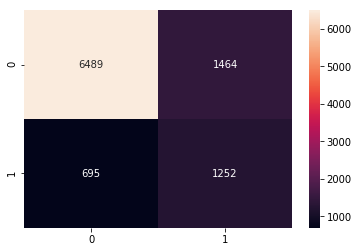

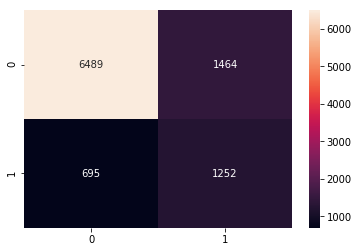

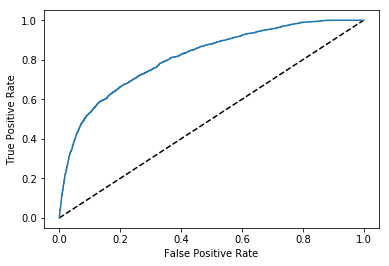

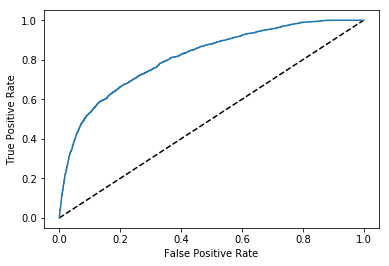

In [35]:
# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = con
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = cat
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.

clf = Pipeline(steps=[('preprocessor', preprocessor),
#                       ('interact', PolynomialFeatures(degree=2)),
                      ('sample',  RandomOverSampler()),
                      ('classifier', XGBClassifier())])


param_grid = {# 'pca__n_components': [2,5,10],
    'classifier__n_estimators': [100],#[100,500,800, 1000],
     "classifier__learning_rate": [0.2],#[ 0.2, 0.5],
    "classifier__max_depth":[2],#[2,5,8],
    "classifier__max_features":["sqrt"]
}



rf_cv = GridSearchCV(clf, param_grid, cv = 5, scoring='recall')

rf_cv.fit(x_train, y_train)



y_pred_proba = rf_cv.predict_proba(x_test)[:,1]
# Evaluate test-set roc_auc_score
rf_roc_auc = roc_auc_score(y_test, y_pred_proba)

print("model score: %.3f" % rf_cv.score(x_test, y_test))
# Print roc_auc_score
print('ROC AUC score: {:.4f}'.format(rf_roc_auc))
print("Tuned Random Forest Parameter: {}".format(rf_cv.best_params_))
print("Tuned Random Forest Accuracy: {}".format(rf_cv.best_score_))

predictions_rf = rf_cv.predict(x_test)
# Classification Report of Prediction
print("Classification Report:")
print(classification_report(y_test, predictions_rf))
# Confusion Matrix for predictions made
conf2 = confusion_matrix(y_test,predictions_rf)
print(conf2)
# Plot Confusion Matrix
label = ["0","1"]
sns.heatmap(conf2, annot=True, xticklabels=label, yticklabels=label,fmt='g')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

model score: 0.537
ROC AUC score: 0.8123
Tuned Random Forest Parameter: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 2, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 100}
Tuned Random Forest Accuracy: 0.5396776308971486
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      7953
           1       0.46      0.64      0.54      1947

   micro avg       0.78      0.78      0.78      9900
   macro avg       0.68      0.73      0.70      9900
weighted avg       0.82      0.78      0.80      9900

[[6512 1441]
 [ 702 1245]]
model score: 0.537
ROC AUC score: 0.8123
Tuned Random Forest Parameter: {'classifier__learning_rate': 0.2, 'classifier__max_depth': 2, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 100}
Tuned Random Forest Accuracy: 0.5396776308971486
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.82      

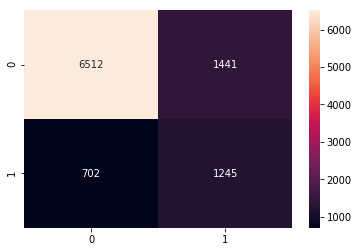

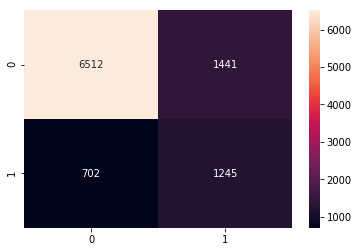

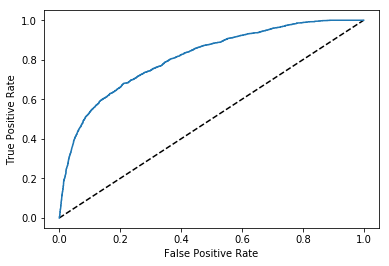

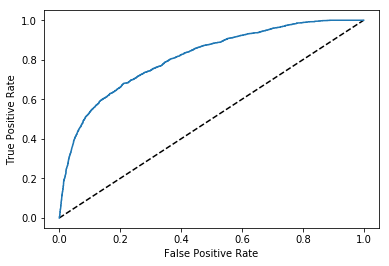

In [37]:
# We create the preprocessing pipelines for both numeric and categorical data.
numeric_features = con
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = cat
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(steps=[('preprocessor', preprocessor),
#                       ('interact', PolynomialFeatures(degree=2)),
                      ('sample',  RandomOverSampler()),
                      ('classifier', XGBClassifier())])


# param_grid = {# 'pca__n_components': [2,5,10],
#     'classifier__n_estimators': [100,500,800, 1000],
#      "classifier__learning_rate": [ 0.2, 0.5],
#     "classifier__max_depth":[2,5,8],
#     "classifier__max_features":["sqrt"]
# }

param_grid = {# 'pca__n_components': [2,5,10],
    'classifier__n_estimators': [100],#[100,500,800, 1000],
     "classifier__learning_rate": [0.2],#[ 0.2, 0.5],
    "classifier__max_depth":[2],#[2,5,8],
    "classifier__max_features":["sqrt"]
}

rf_cv = GridSearchCV(clf, param_grid, cv = 5, scoring='f1')

rf_cv.fit(x_train, y_train)



y_pred_proba = rf_cv.predict_proba(x_test)[:,1]
# Evaluate test-set roc_auc_score
rf_roc_auc = roc_auc_score(y_test, y_pred_proba)

print("model score: %.3f" % rf_cv.score(x_test, y_test))
# Print roc_auc_score
print('ROC AUC score: {:.4f}'.format(rf_roc_auc))
print("Tuned Random Forest Parameter: {}".format(rf_cv.best_params_))
print("Tuned Random Forest Accuracy: {}".format(rf_cv.best_score_))

predictions_rf = rf_cv.predict(x_test)
# Classification Report of Prediction
print("Classification Report:")
print(classification_report(y_test, predictions_rf))
# Confusion Matrix for predictions made
conf2 = confusion_matrix(y_test,predictions_rf)
print(conf2)
# Plot Confusion Matrix
label = ["0","1"]
sns.heatmap(conf2, annot=True, xticklabels=label, yticklabels=label,fmt='g')
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()